## Prawesh Dahal
### Speech Emotion Recognition
 
## Data Preparation for RNN

In [1]:
import numpy as np
import librosa
import scipy
from scipy.io import wavfile
import os, time, csv, datetime
from librosa import display
import matplotlib.pyplot as plt 
from numpy import diff
import h5py 

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

In [2]:
#Get inside directory 
parent_dir = os.getcwd()
dataset_dir = os.path.join(parent_dir,'RAVDESS')
print(parent_dir)
print(dataset_dir)

C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS


In [3]:
length_wave_max = 85346 #maximum length of the audio waves
 
emo_label ={0: 'neutral', 1:'calm', 2: 'happy',
            3: 'sad',   4: 'angry', 5: 'fearful',
            6: 'disgust', 7: 'surprise'}

features = []
labels  = []
max_frame_len = 442 #maximum length of the audio waves
emotionset = [0, 1, 2, 3, 4, 5, 6, 7]

#Calculate spectrogram for each set
#Frame and hop length
sr = 22050
frame_t = 0.05 #50ms 
frame_n = round(sr*frame_t) 
hop_n = round(0.01*sr) #10ms hop length

In [4]:
totalem = range(len(emotionset))
tr_wave = []
tr_lab = []
val_wave = []
val_lab = []
test_wave = []
test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_dir = os.path.join(dataset_dir, str(emotion))
    print(emotion_dir)
    
    file_list = os.listdir(emotion_dir)
    sett = range(len(file_list))
    
    for filenum in sett:
        
        #Load the dataset 
        y, sr = librosa.load(os.path.join(emotion_dir, file_list[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y = y[:length_wave_max]
        if len(y) < length_wave_max:
            y = np.concatenate([y, np.zeros(length_wave_max-len(y))])
            
        _waveform.append(y)
        _labels.append(emotion)
        
        waveform = np.array(_waveform)
        labels = np.array(_labels)

    X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    print('Split Training into: ',X_train.shape, y_train.shape)
    print('Split Valid. into: ',X_val.shape, y_val.shape)
    print('Split Test into:', X_test.shape, y_test.shape)

    
    tr_wave.append(X_train)
    tr_lab.append(y_train)
     

    val_wave.append(X_val)
    val_lab.append(y_val)
     

    test_wave.append(X_test)
    test_lab.append(y_test)     
 

0
Reading emotion #0 :neutral...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\0
Split Training into:  (68, 85346) (68,)
Split Valid. into:  (8, 85346) (8,)
Split Test into: (20, 85346) (20,)
1
Reading emotion #1 :calm...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\1
Split Training into:  (137, 85346) (137,)
Split Valid. into:  (16, 85346) (16,)
Split Test into: (39, 85346) (39,)
2
Reading emotion #2 :happy...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\2
Split Training into:  (137, 85346) (137,)
Split Valid. into:  (16, 85346) (16,)
Split Test into: (39, 85346) (39,)
3
Reading emotion #3 :sad...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Speech Proc\RAVDESS\3
Split Training into:  (137, 85346) (137,)
Split Valid. into:  (16, 85346) (16,)
Split Test into: (39, 85346) (39,)
4
Reading emotion #4 :angry...
C:\Users\Prawesh\Insync\COLUMBIA 2023\Spring 2019\ELEN 6820 Sp

Total Training set (1027, 85346)
Total Validation set (120, 85346)
Total Test set (293, 85346)


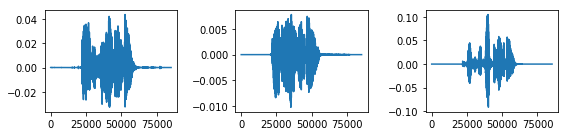

In [5]:
 #Concatenate all training, validate and test for all emotions
tr_w = np.array(tr_wave); tr_w = np.vstack((tr_w[0], tr_w[1], tr_w[2], tr_w[3], tr_w[4], tr_w[5], tr_w[6], tr_w[7]))
tr_l = np.array(tr_lab);  tr_l = np.hstack((tr_l[0], tr_l[1], tr_l[2], tr_l[3], tr_l[4], tr_l[5], tr_l[6], tr_l[7])) 
print('Total Training set',tr_w.shape) 

val_w = np.array(val_wave); val_w = np.vstack((val_w[0], val_w[1], val_w[2], val_w[3], val_w[4] , val_w[5], val_w[6], val_w[7]))
val_l = np.array(val_lab);  val_l = np.hstack((val_l[0], val_l[1], val_l[2], val_l[3], val_l[4], val_l[5], val_l[6], val_l[7])) 
print('Total Validation set',val_w.shape) 

test_w = np.array(test_wave); test_w = np.vstack((test_w[0], test_w[1], test_w[2], test_w[3], test_w[4], test_w[5], test_w[6], test_w[7]))
test_l = np.array(test_lab);  test_l = np.hstack((test_l[0], test_l[1], test_l[2], test_l[3], test_l[4], test_l[5], test_l[6], test_l[7])) 
print('Total Test set',test_w.shape) 

plt.figure(1, figsize=(8,2))
plt.subplot(131); plt.plot(tr_w[334,:])
plt.subplot(132); plt.plot(val_w[19,:])
plt.subplot(133); plt.plot(test_w[111,:])
plt.tight_layout() 

 

(128, 388)


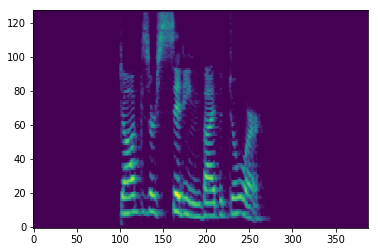

In [41]:
# mydata = tr_w
# y = mydata[111,:]
# spec = librosa.stft(y, n_fft=frame_n, hop_length=hop_n)
# melspec = librosa.feature.melspectrogram(y,n_fft=frame_n, hop_length=hop_n)
# log_power_spec = 10*np.log10(np.abs(melspec)**2 + 1e-8)

# print(log_power_spec.shape)

# plt.imshow(log_power_spec, origin='lower',aspect ='auto')

## HDF5
#### Computer log-mel-spectogram and save them. 

In [6]:
tr_name = 'tr_melsetall8.hdf5'
val_name = 'val_melsetall8.hdf5'
test_name = 'test_melsetall8.hdf5'

tr_dataset = h5py.File(tr_name, 'a')
val_dataset = h5py.File(val_name, 'a')
test_dataset = h5py.File(test_name, 'a')

#Calculate spectrogram for each set
#Frame and hop length
sr = 22050
frame_t = 0.05 #50ms 
frame_n = round(sr*frame_t) 
hop_n = round(0.01*sr) #10ms hop length

for sets in range(3): 
    if sets == 0:
        mydata = tr_w
    if sets == 1:
        mydata = val_w
    if sets == 2: 
        mydata = test_w 
        
    print('Three sets - Reading Set #' + str(sets) + ' out of 2 :')
    
    for wavs in range(len(mydata)): 
        
        y = mydata[wavs,:]
        melspec = librosa.feature.melspectrogram(y,n_fft=frame_n, hop_length=hop_n)
        log_power_spec = 10*np.log10(np.abs(melspec)**2 + 1e-8)
        freq_len = log_power_spec.shape[0]
        num_frame = log_power_spec.shape[1]  # this should be the same for all the utterances, since we map them into same length
        
        #Store Training Data
        if sets == 0 and wavs == 0: 
            # create sub-datasets
            print('Creating training sub-dataset - waveform, spec and emotions')
            tr_dataset.create_dataset('waveform', shape=(len(mydata), length_wave_max), dtype=np.float32)
            tr_dataset.create_dataset('spec', shape=(len(mydata), freq_len, num_frame), dtype=np.float32)
            tr_dataset.create_dataset('emotions', shape=(len(mydata), 1), dtype=np.int)

        
        if sets ==0: 
            tr_dataset['waveform'][wavs] = y
            tr_dataset['spec'][wavs] = log_power_spec
            tr_dataset['emotions'][wavs] = tr_l[wavs]
            
        #Store Validation Data
        if sets == 1 and wavs == 0: 
            # create sub-datasets
            print('Creating val sub-dataset - waveform, spec and emotions')
            val_dataset.create_dataset('waveform', shape=(len(mydata), length_wave_max), dtype=np.float32)
            val_dataset.create_dataset('spec', shape=(len(mydata), freq_len, num_frame), dtype=np.float32)
            val_dataset.create_dataset('emotions', shape=(len(mydata), 1), dtype=np.int)

        
        if sets == 1: 
            val_dataset['waveform'][wavs] = y
            val_dataset['spec'][wavs] = log_power_spec
            val_dataset['emotions'][wavs] = val_l[wavs]

            
            
        #Store Test Data
        if sets == 2 and wavs == 0: 
            # create sub-datasets
            print('Creating test sub-dataset - waveform, spec and emotions')
            test_dataset.create_dataset('waveform', shape=(len(mydata), length_wave_max), dtype=np.float32)
            test_dataset.create_dataset('spec', shape=(len(mydata), freq_len, num_frame), dtype=np.float32)
            test_dataset.create_dataset('emotions', shape=(len(mydata), 1), dtype=np.int)

        
        if sets == 2: 
            test_dataset['waveform'][wavs] = y
            test_dataset['spec'][wavs] = log_power_spec 
            test_dataset['emotions'][wavs] = test_l[wavs]         

            
            
tr_dataset.close()
val_dataset.close()
test_dataset.close()   
            

Three sets - Reading Set #0 out of 2 :
Creating training sub-dataset - waveform, spec and emotions
Three sets - Reading Set #1 out of 2 :
Creating val sub-dataset - waveform, spec and emotions
Three sets - Reading Set #2 out of 2 :
Creating test sub-dataset - waveform, spec and emotions


### Plot sample spectograms before normalization

Training Spectrogram (1027, 128, 388) & Labels (1027, 1)
Validation Spectrogram (120, 128, 388) & Labels (120, 1)
Test Spectrogram (293, 128, 388) & Labels (293, 1)


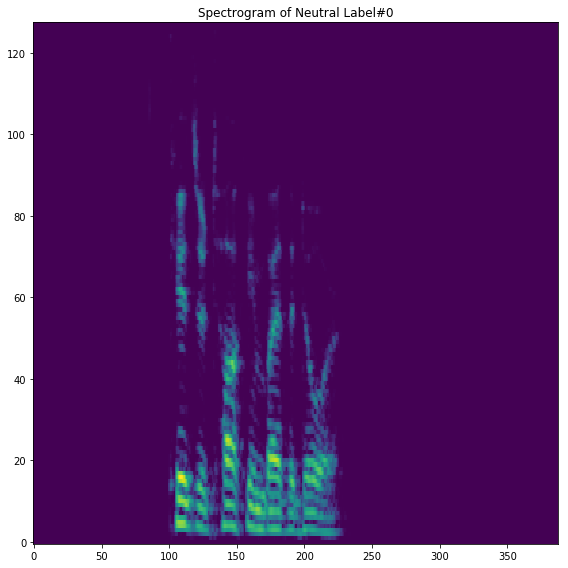

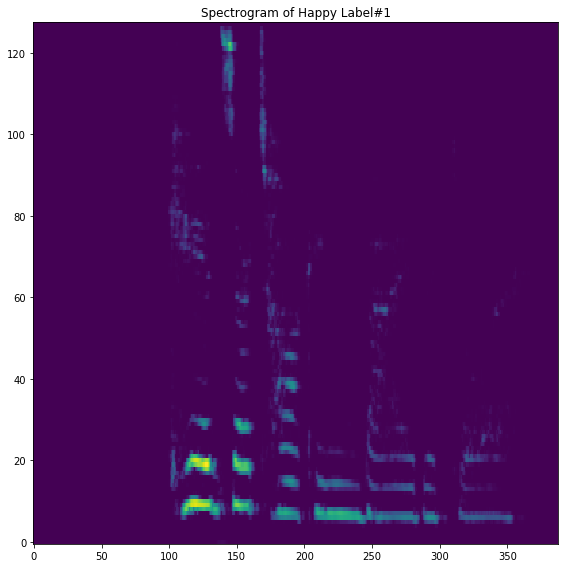

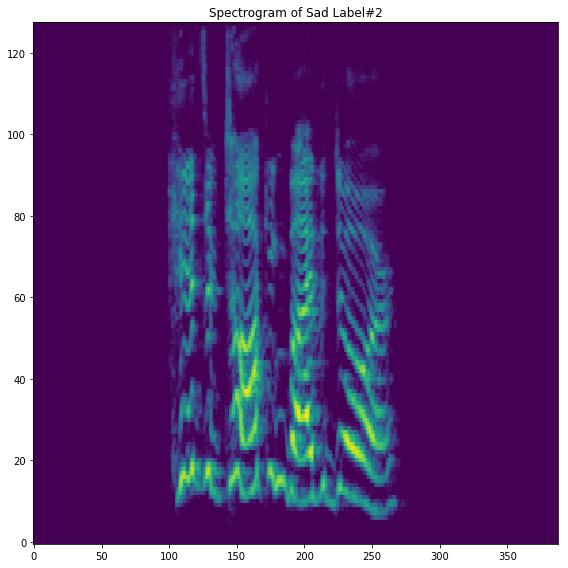

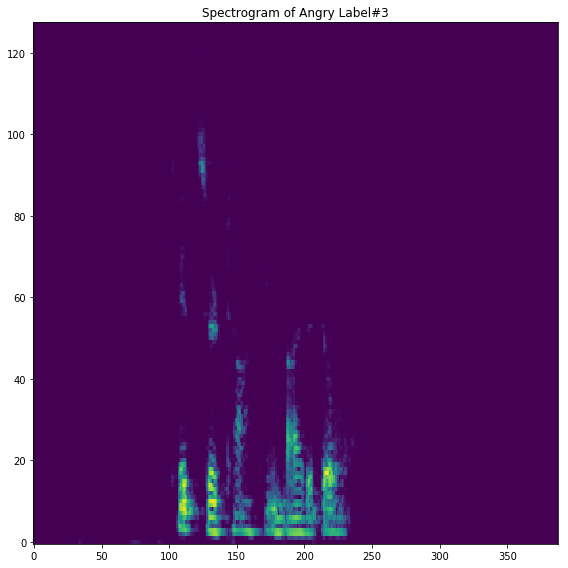

In [7]:
# load the created datasets 
tr_name = 'tr_melsetall8.hdf5'
val_name = 'val_melsetall8.hdf5'
test_name = 'test_melsetall8.hdf5'

tr_dataset = h5py.File(tr_name, 'a')
val_dataset = h5py.File(val_name, 'a')
test_dataset = h5py.File(test_name, 'a')

print('Training Spectrogram',tr_dataset['spec'].shape,'& Labels', tr_dataset['emotions'].shape)
print('Validation Spectrogram',val_dataset['spec'].shape,'& Labels', val_dataset['emotions'].shape)
print('Test Spectrogram',test_dataset['spec'].shape,'& Labels', test_dataset['emotions'].shape)
 
#Sample Spectrograms
tr_spec = tr_dataset['spec']  # shape: (num_data, n_fft/2+1, T)

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[50], origin='lower',aspect ='auto')
plt.title('Spectrogram of Neutral Label#{}'.format(tr_l[50]))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[150], origin='lower',aspect ='auto')
plt.title('Spectrogram of Happy Label#{}'.format(tr_l[150]))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[320], origin='lower',aspect ='auto')
plt.title('Spectrogram of Sad Label#{}'.format(tr_l[310]))
plt.tight_layout()
plt.show()
 
plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[440], origin='lower',aspect ='auto')
plt.title('Spectrogram of Angry Label#{}'.format(tr_l[440]))
plt.tight_layout()
plt.show() 


 #### Normalization and plot 

Training Spectrogram (1027, 128, 388) & Labels (1027, 1)
Validation Spectrogram (120, 128, 388) & Labels (120, 1)
Test Spectrogram (293, 128, 388) & Labels (293, 1)


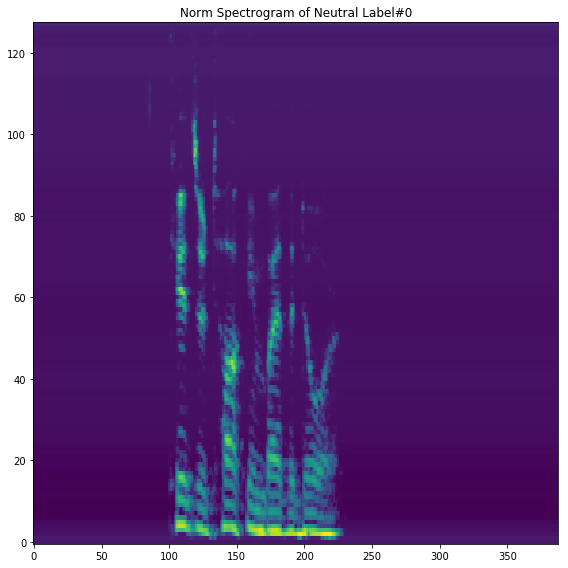

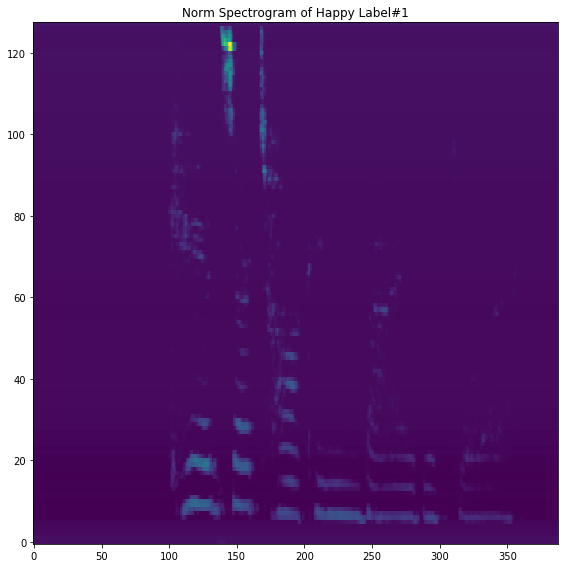

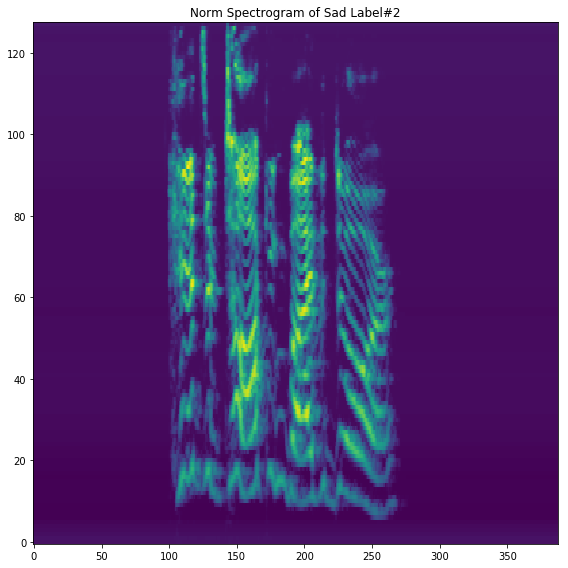

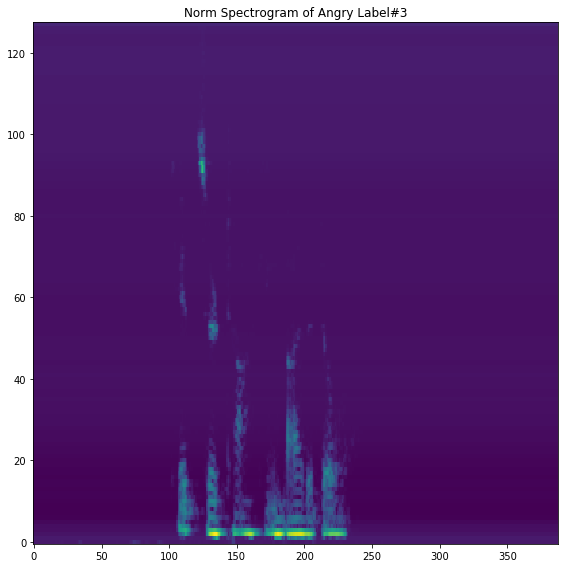

In [8]:
tr_spec = np.transpose(tr_spec[:], (0, 2, 1)).reshape(-1, freq_len)  # shape: (num_data*T, n_fft/2+1)

tr_mean = np.mean(tr_spec, axis=0)  # shape: (n_fft/2+1)

tr_var = np.var(tr_spec, axis=0)  # shape: (n_fft/2+1)

tr_std = np.sqrt(tr_var + 1e-8)  # again for numerical stability

# apply normalization to all the datasets

val_dataset = h5py.File(val_name, 'a')
test_dataset = h5py.File(test_name, 'a')

tr_dataset['spec'][:] = (tr_dataset['spec'][:] - tr_mean.reshape(1,-1,1)) / tr_std.reshape(1,-1,1)
val_dataset['spec'][:] = (val_dataset['spec'][:] - tr_mean.reshape(1,-1,1)) / tr_std.reshape(1,-1,1)
test_dataset['spec'][:] = (test_dataset['spec'][:] - tr_mean.reshape(1,-1,1)) / tr_std.reshape(1,-1,1)


print('Training Spectrogram',tr_dataset['spec'].shape,'& Labels', tr_dataset['emotions'].shape)
print('Validation Spectrogram',val_dataset['spec'].shape,'& Labels', val_dataset['emotions'].shape)
print('Test Spectrogram',test_dataset['spec'].shape,'& Labels', test_dataset['emotions'].shape)
 
#Sample Spectrograms
tr_spec = tr_dataset['spec']  # shape: (num_data, n_fft/2+1, T)

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[50], origin='lower',aspect ='auto')
plt.title('Norm Spectrogram of Neutral Label#{}'.format(tr_l[50]))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[150], origin='lower',aspect ='auto')
plt.title('Norm Spectrogram of Happy Label#{}'.format(tr_l[150]))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[320], origin='lower',aspect ='auto')
plt.title('Norm Spectrogram of Sad Label#{}'.format(tr_l[310]))
plt.tight_layout()
plt.show()
 
plt.figure(figsize=(8, 8))
plt.imshow(tr_spec[440], origin='lower',aspect ='auto')
plt.title('Norm Spectrogram of Angry Label#{}'.format(tr_l[440]))
plt.tight_layout()
plt.show() 


In [9]:
tr_dataset.close()
val_dataset.close()
test_dataset.close()

# save the mean and std information in files
np.save('training_mean_mel', tr_mean)
np.save('training_std_mel', tr_std)